In [104]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

def clean_string(my_list,string):
    data =[]
    for item in my_list:
        a = re.sub(string,'',item)
        data.append(a)
    return data

df = pd.read_csv('.\FIFAPlayersData.csv')

#~~~~DATA WRANGLING~~~~~~~~~
del df['Unnamed: 0']
org_coln_names = df.columns
new_coln_names = ['Potential', 'Passing', 'Best Position', 'Loan', 'Growth', 'Value', 'Shooting',
       'Total Stats', 'Pace', 'Overall', 'Player ID', 'Defending', 'Physical', 'Wage',
       'Age', 'Dribbling', 'Contract', 'Name', 'Team']
df.columns = new_coln_names
#Dropping duplicates
df.drop_duplicates(subset ="Player ID",keep = False, inplace = True)

#Reordering columns
df = df[['Player ID','Name','Age','Best Position','Overall','Potential','Growth'   ,'Team','Value','Wage',
         'Contract' ,'Loan','Total Stats','Passing','Shooting','Pace'  ,'Defending','Physical','Dribbling']]

#Cleaning wages and values, turning into int
df['Value'] = df['Value'].replace({"€":"","K":"*1000","M":"*1000000"},regex=True).map(pd.eval).astype(int)
df['Wage'] = df['Wage'].replace({"€": "","K":"*1000"},regex=True).map(pd.eval).astype(int)

#Filter players that no longer play, with contract ending earlier than 2021. 
df[['Contract Start','Contract End']] = df['Contract'].str.split('~',expand=True)

#Filter zeros in values/Free agents and players over 40 a players under 70 of overall
df = df[df['Value']>0]
df = df[df['Age']<40]
df = df[df['Overall']>70]

#Filter players not playing anymore
df['Contract End'] = df['Contract End'].apply(lambda x: "2021" if x is None else x)
df['Contract End'] = df['Contract End'].astype(int)
df = df[df['Contract End']>2020]




df.head()



,Player ID,Name,Age,Best Position,Overall,Potential,Growth,Team,Value,Wage,...,Loan,Total Stats,Passing,Shooting,Pace,Defending,Physical,Dribbling,Contract Start,Contract End
60,248695,W. Fofana,19,CB,78,86,8,Leicester City,28500000,36000,...,NaN,1766,55,37,73,80,77,63,2020,2025
61,246669,B. Saka,18,CAM,79,88,9,Arsenal,37000000,29000,...,NaN,2034,76,66,84,65,64,82,2018,2025
62,227558,J. Siebatcheu,24,ST,71,75,4,"BSC Young BoysJun , On Loan",2700000,25000,...,"Jun 30, 2021",1692,58,70,64,29,71,67,"Jun 30, 2021 On Loan",2021
63,247394,D. Kulusevski,20,CAM,78,88,10,Juventus,31000000,58000,...,NaN,2005,76,72,82,56,75,80,2019,2024
64,245037,Eric García,19,CB,75,85,10,Manchester City,11500000,42000,...,NaN,1693,58,36,64,75,72,65,2017,2022


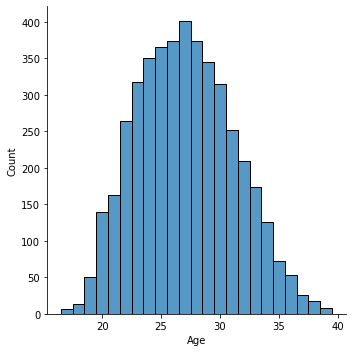

In [125]:
#~~~~DATA EXPLORATION
age_dist = sns.displot(df,x="Age",discrete=True)


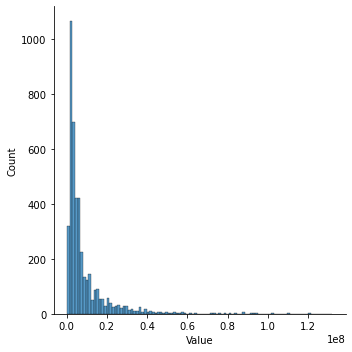

In [126]:
value_dist = sns.displot(df,x="Value", bins=100)

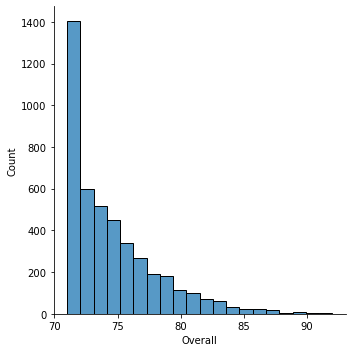

In [149]:
overall_dist = sns.displot(df,x="Overall",bins = 20)

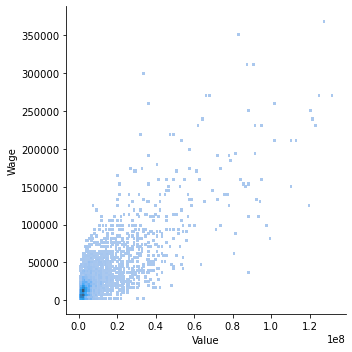

In [128]:
value_vs_wages_scat=sns.displot(data=df, x="Value", y="Wage")

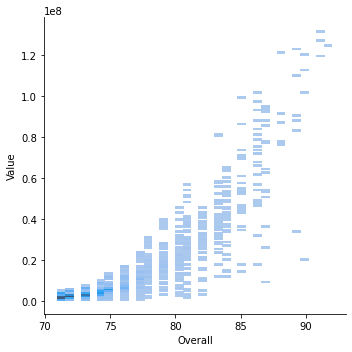

In [129]:
overall_vs_value_scat = sns.displot(data=df, x="Overall", y="Value")

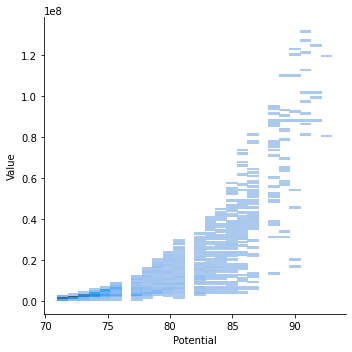

In [146]:
sns.displot(data=df, x="Potential", y="Value")

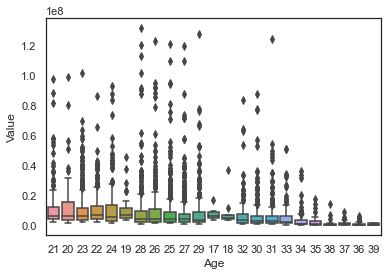

In [163]:
#Getting a sorted boxplot Value vs Age
grouped = df.groupby('Age')
sorted_averages = (
    pd.DataFrame({col: vals['Value'] for col, vals in grouped})
    .mean()
    .sort_values(ascending=False)
)
boxp_val_vs_age = sns.boxplot(x="Age", y="Value", data=df,order=sorted_averages.index)

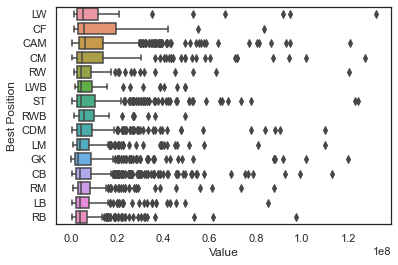

In [166]:
#Getting a sorted boxplot Value vs Best Position
grouped = df.groupby('Best Position')
sorted_averages = (
    pd.DataFrame({col: vals['Value'] for col, vals in grouped})
    .mean()
    .sort_values(ascending=False)
)
boxp_val_vs_bp = sns.boxplot(x="Value", y="Best Position", data=df, order=sorted_averages.index)


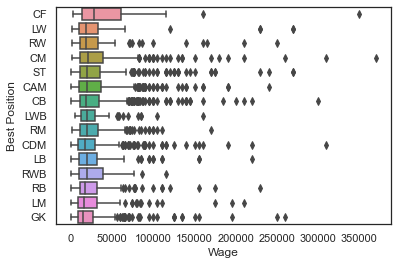

In [167]:
#Getting a sorted boxplot Wage vs Best Position
grouped = df.groupby('Best Position')
sorted_averages = (
    pd.DataFrame({col: vals['Wage'] for col, vals in grouped})
    .mean()
    .sort_values(ascending=False)
)
boxp_val_vs_bp = sns.boxplot(x="Wage", y="Best Position", data=df, order=sorted_averages.index)

In [153]:
#Creating groups by Overall
df_71_75 = df[df['Overall']<76]
df_76_80 = df[(df['Overall']<81)&(df['Overall']>75)]
df_81_85 = df[(df['Overall']<86)&(df['Overall']>80)]
df_86_90 = df[(df['Overall']<91)&(df['Overall']>85)]
df_90 = df[df['Overall']>90]



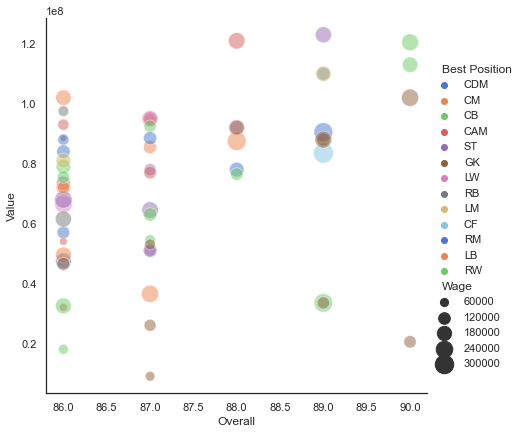

In [155]:
sns.set_theme(style="white")
sns.relplot(x="Overall", y="Value", hue="Best Position", size="Wage",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_86_90)

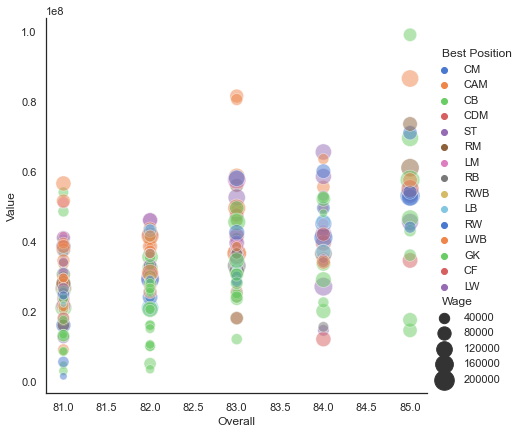

In [156]:
sns.relplot(x="Overall", y="Value", hue="Best Position", size="Wage",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_81_85)

AxesSubplot(0.125,0.125;0.775x0.755)
